![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/competitions/miad2024-12-prediccion-precio-vehiculos).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Importación librerías
import pandas as pd
import numpy as np

In [17]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

In [18]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [19]:
# Visualización datos de test
dataTesting.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,MD,Nissan,MuranoAWD
1,2017,5362,FL,Jeep,Wrangler
2,2014,50300,OH,Ford,FlexLimited
3,2004,132160,WA,BMW,5
4,2015,25226,MA,Jeep,Grand


In [20]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 75000 + 5000, index=dataTesting.index, columns=['Price'])

In [21]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
ID,
0,33090.508914
1,76303.572981
2,59899.545636
3,49899.386315
4,16701.398033


# DESARROLLO DE LAB

In [22]:
# Importacion de datos y separacion X - y
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split

dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

# Datos X - y
X = dataTraining.drop(columns=['Price'])
y = dataTraining['Price']

# Dividir los datos de Train en conjunto de entrenamiento y conjunto de prueba
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=0)

In [23]:
# Aplicar One-Hot Encoding a las variables categóricas en dataset Training
XTrain_encoded = pd.get_dummies(XTrain, dtype=int)
XTest_encoded = pd.get_dummies(XTest, dtype=int)
XTest_encoded.head()

,Year,Mileage,State_ AK,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DC,...,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr
242160,2010,115991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3413,2014,48093,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
393024,2016,5494,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247987,2016,43217,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52436,2013,37664,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
XTrain_encoded.describe()

,Year,Mileage,State_ AK,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DC,...,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr
count,268000.000000,2.680000e+05,268000.000000,268000.000000,268000.000000,268000.000000,268000.000000,268000.000000,268000.000000,268000.000000,...,268000.000000,268000.000000,268000.000000,268000.000000,268000.000000,268000.000000,268000.000000,268000.000000,268000.000000,268000.000000
mean,2013.199560,5.504151e+04,0.002093,0.015955,0.007821,0.026590,0.090463,0.027254,0.012261,0.000015,...,0.000131,0.000168,0.000194,0.004078,0.002187,0.003104,0.000213,0.000713,0.000739,0.000224
std,3.296668,4.066074e+04,0.045705,0.125302,0.088089,0.160881,0.286844,0.162822,0.110050,0.003863,...,0.011427,0.012957,0.013928,0.063732,0.046710,0.055631,0.014582,0.026687,0.027171,0.014961
min,1997.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,2.582100e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,4.294000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,7.742425e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2018.000000,1.401471e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
XTrain_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268000 entries, 219421 to 305711
Columns: 616 entries, Year to Model_xD5dr
dtypes: int64(616)
memory usage: 1.2 GB


In [26]:
# Aplicar One-Hot Encoding a las variables categóricas en dataset Testing
indice = XTest_encoded.columns.get_loc("Make_Freightliner")
XTest_encoded_final = pd.get_dummies(dataTesting, dtype=int)
# Creacion columna Make_Freightliner en DF Testing ya que no existe en este, pero si en el de DF Training.
columna = pd.Series([0] * len(XTest_encoded_final), name="Make_Freightliner")  # Crear la nueva columna con valores 0
XTest_encoded_final.insert(loc=indice, column="Make_Freightliner", value=columna) # Inserta la columna en el DF
XTest_encoded_final.head()

,Year,Mileage,State_ AK,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DC,...,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr
ID,,,,,,,,,,,,,,,,,,,,,
0,2014,31909,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,5362,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,50300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2004,132160,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,25226,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Tunning max_depth - Overfitting

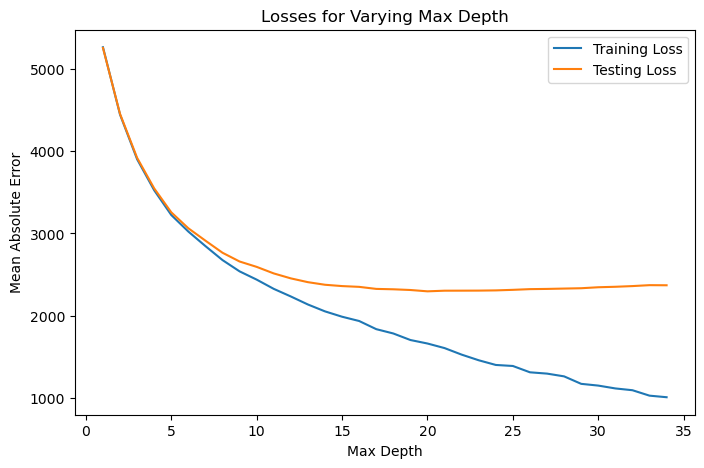

In [27]:
# XGB - Tunning de max depth para ver overfitting
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Vary max_depth hyperparameter
max_depths = list(range(1, 35))
train_losses_depth = []
test_losses_depth = []

for max_depth in max_depths:
    rf = XGBRegressor(n_estimators=100, max_depth=max_depth, random_state=42, n_jobs=-1)
    rf.fit(XTrain_encoded, yTrain)

    train_pred = rf.predict(XTrain_encoded)
    test_pred = rf.predict(XTest_encoded)

    train_loss = mean_absolute_error(yTrain, train_pred)
    test_loss = mean_absolute_error(yTest, test_pred)

    train_losses_depth.append(train_loss)
    test_losses_depth.append(test_loss)

# Plot the training and testing losses for max_depth
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))

ax1.plot(max_depths, train_losses_depth, label="Training Loss")
ax1.plot(max_depths, test_losses_depth, label="Testing Loss")
ax1.set_xlabel("Max Depth")
ax1.set_ylabel("Mean Absolute Error")
ax1.legend()
ax1.set_title("Losses for Varying Max Depth")

plt.show()

### Learning rates

[0]	eval-mae:8303.71598
[100]	eval-mae:5760.68036
[200]	eval-mae:5129.71376
[300]	eval-mae:4745.13372
[399]	eval-mae:4461.51622
[0]	eval-mae:8187.47802
[100]	eval-mae:5104.34724
[200]	eval-mae:4419.96247
[300]	eval-mae:4026.37265
[399]	eval-mae:3739.14557
[0]	eval-mae:7770.27034
[100]	eval-mae:3910.31052
[200]	eval-mae:3249.35214
[300]	eval-mae:2923.14658
[399]	eval-mae:2729.85706
[0]	eval-mae:7432.63626
[100]	eval-mae:3370.90401
[200]	eval-mae:2812.79332
[300]	eval-mae:2581.11315
[399]	eval-mae:2452.62838
[0]	eval-mae:7183.63934
[100]	eval-mae:3054.87523
[200]	eval-mae:2628.89228
[300]	eval-mae:2426.31503
[399]	eval-mae:2346.82454
[0]	eval-mae:7095.19539
[100]	eval-mae:2960.87986
[200]	eval-mae:2546.71140
[300]	eval-mae:2409.05637
[399]	eval-mae:2328.32317
[0]	eval-mae:7033.08982
[100]	eval-mae:2850.09935
[200]	eval-mae:2528.26370
[300]	eval-mae:2385.74990
[399]	eval-mae:2321.01125


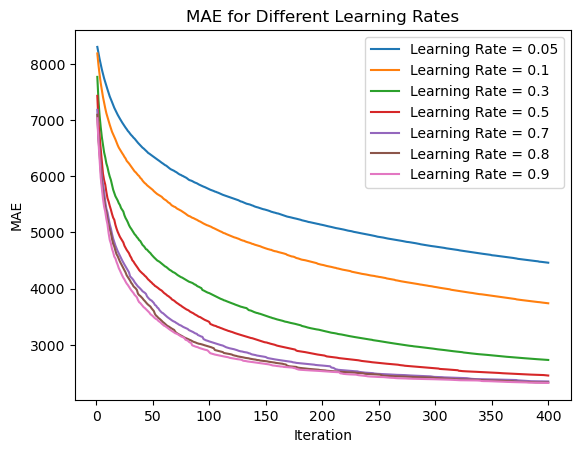

In [28]:
# Prepare data for XGBoost
import xgboost as xgb

dtrain = xgb.DMatrix(XTrain_encoded, label=yTrain)
dtest = xgb.DMatrix(XTest_encoded, label=yTest)

# Define the parameters for XGBoost
param = {
    'max_depth': 3,
    'n_jobs': -1,
    'objective': 'reg:linear',  # Cambiado a regresión lineal
    'eval_metric': 'mae'  # Usando MAE como métrica de evaluación
}
num_round = 400

# Train XGBoost with different learning rates
learning_rates = [0.05, 0.1, 0.3, 0.5, 0.7, 0.8, 0.9]
loss_history = {}

for lr in learning_rates:
    param['eta'] = lr

    evals_result = {}  # Store evaluation results
    bst = xgb.train(param, dtrain, num_round, early_stopping_rounds=10, evals=[(dtest, 'eval')], 
                    evals_result=evals_result, verbose_eval=100)

    loss_history[lr] = evals_result['eval']['mae']  # Cambiado a 'mae'

# Plot the loss functions for each learning rate
for lr, losses in loss_history.items():
    plt.plot(range(1, len(losses) + 1), losses, label=f"Learning Rate = {lr}")

plt.xlabel("Iteration")
plt.ylabel("MAE")
plt.legend()
plt.title("MAE for Different Learning Rates")
plt.show()

### Calibracion n_estimators

In [29]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# Creación de lista de valores para iterar sobre diferentes valores de n_estimators
estimator_range = range(50, 550, 50)

# Definición de lista para almacenar el MAE promedio para cada valor de n_estimators
mae_scores = []

# Uso de un 5-fold cross-validation para cada valor de n_estimators
for estimator in estimator_range:
    clf = XGBRegressor(n_estimators=estimator, random_state=1, n_jobs=-1)
    mae_scores.append(-cross_val_score(clf, XTrain_encoded, yTrain, cv=5, scoring='neg_mean_absolute_error').mean())  # Usando neg_mean_absolute_error para un problema de regresión



### Regularización y overfitting


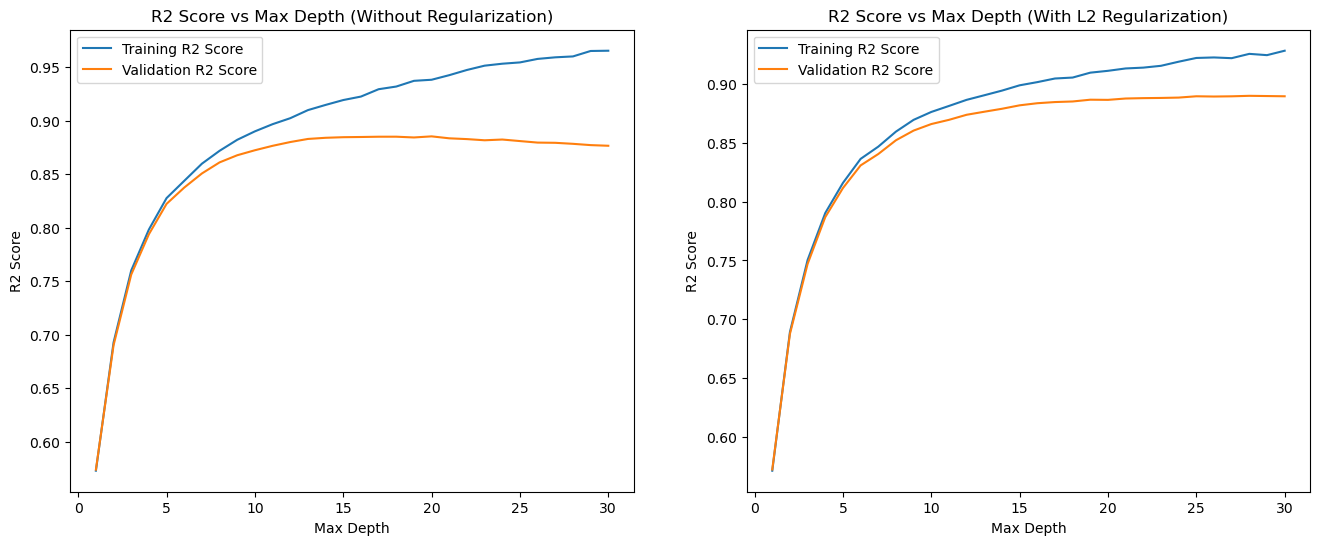

In [30]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


# Initialize lists to store training and validation R2 scores
train_r2_scores = []
val_r2_scores = []

train_r2_scores_reg = []
val_r2_scores_reg = []

max_depths = list(range(1, 31))

for max_depth in max_depths:
    # Train XGBoost without regularization
    xgb_model = xgb.XGBRegressor(max_depth=max_depth, random_state=42, n_jobs=-1)
    xgb_model.fit(XTrain_encoded, yTrain)
    train_r2 = r2_score(yTrain, xgb_model.predict(XTrain_encoded))
    val_r2 = r2_score(yTest, xgb_model.predict(XTest_encoded))
    train_r2_scores.append(train_r2)
    val_r2_scores.append(val_r2)

    # Train XGBoost with L2 regularization (reg_lambda)
    xgb_model_reg = xgb.XGBRegressor(max_depth=max_depth, reg_lambda=20, random_state=42, n_jobs=-1)
    xgb_model_reg.fit(XTrain_encoded, yTrain)
    train_r2_reg = r2_score(yTrain, xgb_model_reg.predict(XTrain_encoded))
    val_r2_reg = r2_score(yTest, xgb_model_reg.predict(XTest_encoded))
    train_r2_scores_reg.append(train_r2_reg)
    val_r2_scores_reg.append(val_r2_reg)

# Plot the training and validation R2 scores without regularization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(max_depths, train_r2_scores, label="Training R2 Score")
ax1.plot(max_depths, val_r2_scores, label="Validation R2 Score")
ax1.set_title("R2 Score vs Max Depth (Without Regularization)")
ax1.set_xlabel("Max Depth")
ax1.set_ylabel("R2 Score")
ax1.legend()

# Plot the training and validation R2 scores with L2 regularization (reg_lambda)
ax2.plot(max_depths, train_r2_scores_reg, label="Training R2 Score")
ax2.plot(max_depths, val_r2_scores_reg, label="Validation R2 Score")
ax2.set_title("R2 Score vs Max Depth (With L2 Regularization)")
ax2.set_xlabel("Max Depth")
ax2.set_ylabel("R2 Score")
ax2.legend()

plt.show()

### Calibracion n_estimators

Text(0, 0.5, 'MAE')

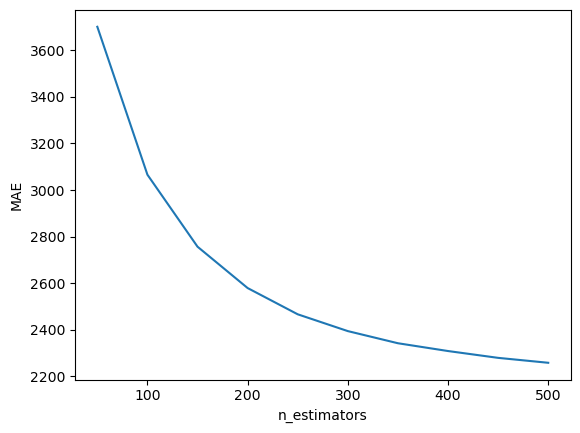

In [31]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# Creación de lista de valores para iterar sobre diferentes valores de n_estimators
estimator_range = range(50, 550, 50)

# Definición de lista para almacenar el MAE promedio para cada valor de n_estimators
mae_scores = []

# Uso de un 5-fold cross-validation para cada valor de n_estimators
for estimator in estimator_range:
    clf = XGBRegressor(n_estimators=estimator, random_state=1, n_jobs=-1)
    mae_scores.append(-cross_val_score(clf, XTrain_encoded, yTrain, cv=5, 
                                       scoring='neg_mean_absolute_error').mean())  # Usando neg_mean_absolute_error para un problema de regresión

# Gráfica del desempeño del modelo vs la cantidad de n_estimators
plt.plot(estimator_range, mae_scores)
plt.xlabel('n_estimators')
plt.ylabel('MAE')

## Validacion MAE con parametros calibrados

In [32]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# Definir el modelo XGBoost para un problema de regresión con paralelismo
clf = XGBRegressor(n_estimators = 600, learning_rate = 0.1, max_depth = 15, reg_lambda=20, n_jobs=-1)


# Entrenar el modelo
clf.fit(XTrain_encoded, yTrain)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(XTest_encoded)

# Calcular el MAE (Mean Absolute Error)
mae = mean_absolute_error(yTest, y_pred)
print("MAE:", mae)


MAE: 2259.482209859212


## Modelo predicciones finales con total de datos y parametros calibrados

In [33]:
# Transformacion de variables categoricas - One-Hot Encoding
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split

dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

# Datos X - y
X = dataTraining.drop(columns=['Price'])
y = dataTraining['Price']

# Aplicar One-Hot Encoding a las variables categóricas
XTrain_encoded = pd.get_dummies(X, dtype=int)
XTrain_encoded.head()

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


# Definir el modelo XGBoost para un problema de regresión con paralelismo
clf = XGBRegressor(n_estimators = 600, learning_rate = 0.1, max_depth = 15, reg_lambda=20, n_jobs=-1)


# Entrenar el modelo
clf.fit(XTrain_encoded, y)

# Aplicar One-Hot Encoding a las variables categóricas en dataset Testing
indice = XTrain_encoded.columns.get_loc("Make_Freightliner")
XTest_encoded_final = pd.get_dummies(dataTesting, dtype=int)
columna = pd.Series([0] * len(XTest_encoded_final), name="Make_Freightliner")  # Crear la nueva columna con valores 0
XTest_encoded_final.insert(loc=indice, column="Make_Freightliner", value=columna)  # Insertar la columna

## Predicciones XGboost - Test
y_pred = clf.predict(XTest_encoded_final)
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['Price']
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
0,21254.515625
1,37856.863281
2,23329.527344
3,8108.225586
4,30453.416016
